<a href="https://colab.research.google.com/github/gitclaudio23/Machine-Learning/blob/main/Tugas2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving gender_submission.csv to gender_submission.csv
File yang diupload: gender_submission.csv
Data awal:
   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

Jumlah missing values sebelum diisi:
PassengerId    0
Survived       0
dtype: int64

Jumlah missing values setelah diisi:
PassengerId    0
Survived       0
dtype: int64

--- Logistic Regression ---
Accuracy: 0.60
Precision: 0.00
Recall: 0.00
F1-Score: 0.00

Classification Report:


<ipython-input-1-92e636fc9068>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].median(), inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: Unde

              precision    recall  f1-score   support

           0       0.60      1.00      0.75        50
           1       0.00      0.00      0.00        34

    accuracy                           0.60        84
   macro avg       0.30      0.50      0.37        84
weighted avg       0.35      0.60      0.44        84


Confusion Matrix:


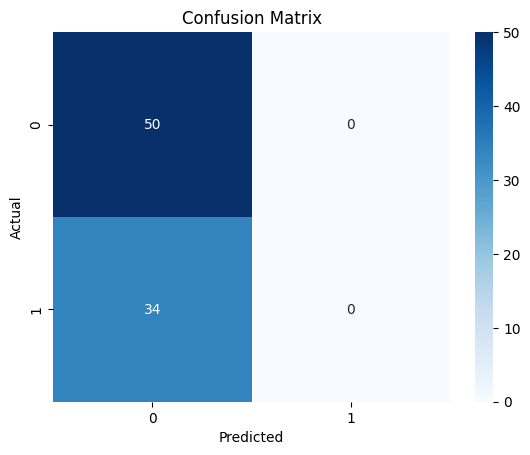


--- k-Nearest Neighbors (kNN) ---
Accuracy: 0.62
Precision: 0.56
Recall: 0.26
F1-Score: 0.36

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.86      0.73        50
           1       0.56      0.26      0.36        34

    accuracy                           0.62        84
   macro avg       0.60      0.56      0.54        84
weighted avg       0.60      0.62      0.58        84


Confusion Matrix:


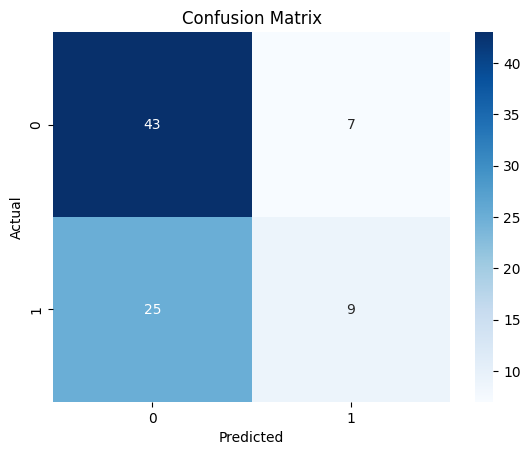


--- Support Vector Machine (SVM) ---
Accuracy: 0.60
Precision: 0.00
Recall: 0.00
F1-Score: 0.00

Classification Report:
              precision    recall  f1-score   support

           0       0.60      1.00      0.75        50
           1       0.00      0.00      0.00        34

    accuracy                           0.60        84
   macro avg       0.30      0.50      0.37        84
weighted avg       0.35      0.60      0.44        84


Confusion Matrix:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

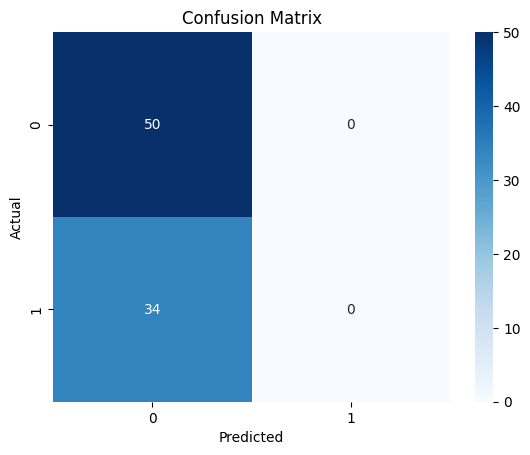

In [ ]:
# Import library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# Upload file CSV
uploaded = files.upload()
for file_name in uploaded.keys():
    print(f"File yang diupload: {file_name}")

# Membaca file CSV
data = pd.read_csv(file_name)

# Menampilkan beberapa baris data
print("Data awal:")
print(data.head())

# Preprocessing Data
# 1. Menangani Missing Values
print("\nJumlah missing values sebelum diisi:")
print(data.isnull().sum())

# Mengisi missing values
for column in data.columns:
    if data[column].dtype == 'object':  # Untuk kolom kategorikal
        data[column].fillna(data[column].mode()[0], inplace=True)
    else:  # Untuk kolom numerik
        data[column].fillna(data[column].median(), inplace=True)

print("\nJumlah missing values setelah diisi:")
print(data.isnull().sum())

# 2. Encoding fitur kategorikal
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# 3. Memisahkan fitur dan target
target_column = "Survived"  # Ganti dengan nama kolom target
X = data.drop(columns=[target_column])
y = data[target_column]

# 4. Normalisasi data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fungsi untuk mengevaluasi model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

# 1. Logistic Regression
print("\n--- Logistic Regression ---")
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
evaluate_model(log_reg, X_test, y_test)

# 2. k-Nearest Neighbors (kNN)
print("\n--- k-Nearest Neighbors (kNN) ---")
knn = KNeighborsClassifier(n_neighbors=5)  # Anda bisa mencoba nilai k lainnya
knn.fit(X_train, y_train)
evaluate_model(knn, X_test, y_test)

# 3. Support Vector Machine (SVM)
print("\n--- Support Vector Machine (SVM) ---")
svm = SVC(kernel='linear')  # Anda bisa mencoba kernel lain seperti 'rbf'
svm.fit(X_train, y_train)
evaluate_model(svm, X_test, y_test)


Saving train.csv to train.csv
File yang diupload: train.csv
Data awal:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  

<ipython-input-2-92e636fc9068>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].median(), inplace=True)
<ipython-input-2-92e636fc9068>:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

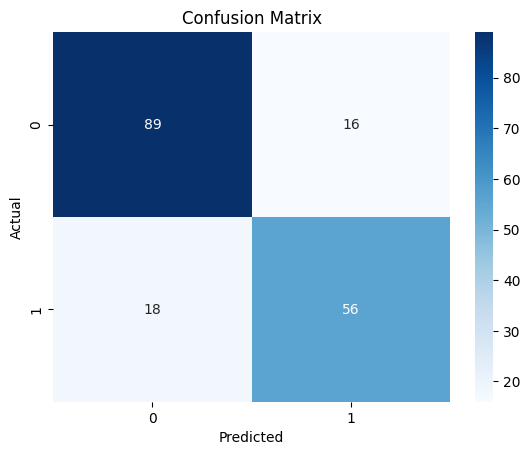


--- k-Nearest Neighbors (kNN) ---
Accuracy: 0.82
Precision: 0.82
Recall: 0.72
F1-Score: 0.76

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.72      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179


Confusion Matrix:


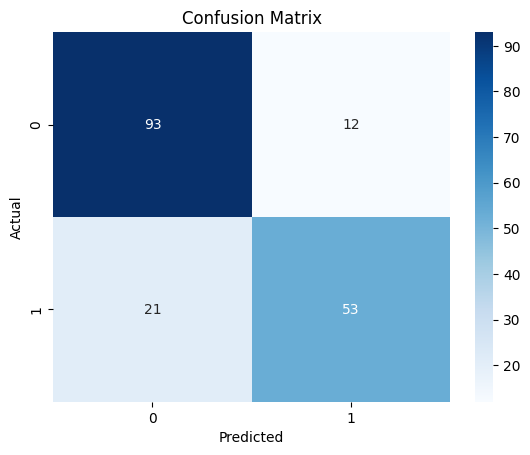


--- Support Vector Machine (SVM) ---
Accuracy: 0.78
Precision: 0.75
Recall: 0.70
F1-Score: 0.73

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179


Confusion Matrix:


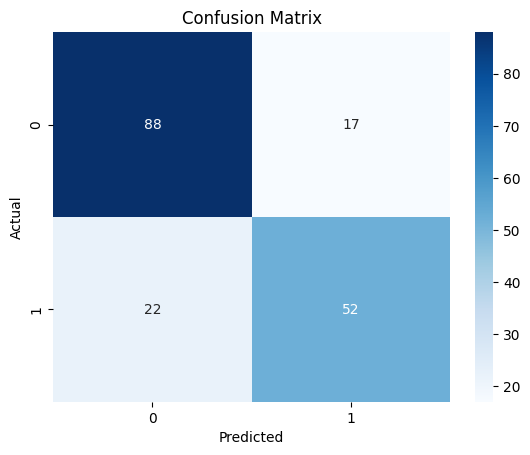

In [ ]:
# Import library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# Upload file CSV
uploaded = files.upload()
for file_name in uploaded.keys():
    print(f"File yang diupload: {file_name}")

# Membaca file CSV
data = pd.read_csv(file_name)

# Menampilkan beberapa baris data
print("Data awal:")
print(data.head())

# Preprocessing Data
# 1. Menangani Missing Values
print("\nJumlah missing values sebelum diisi:")
print(data.isnull().sum())

# Mengisi missing values
for column in data.columns:
    if data[column].dtype == 'object':  # Untuk kolom kategorikal
        data[column].fillna(data[column].mode()[0], inplace=True)
    else:  # Untuk kolom numerik
        data[column].fillna(data[column].median(), inplace=True)

print("\nJumlah missing values setelah diisi:")
print(data.isnull().sum())

# 2. Encoding fitur kategorikal
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# 3. Memisahkan fitur dan target
target_column = "Survived"  # Ganti dengan nama kolom target
X = data.drop(columns=[target_column])
y = data[target_column]

# 4. Normalisasi data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fungsi untuk mengevaluasi model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

# 1. Logistic Regression
print("\n--- Logistic Regression ---")
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
evaluate_model(log_reg, X_test, y_test)

# 2. k-Nearest Neighbors (kNN)
print("\n--- k-Nearest Neighbors (kNN) ---")
knn = KNeighborsClassifier(n_neighbors=5)  # Anda bisa mencoba nilai k lainnya
knn.fit(X_train, y_train)
evaluate_model(knn, X_test, y_test)

# 3. Support Vector Machine (SVM)
print("\n--- Support Vector Machine (SVM) ---")
svm = SVC(kernel='linear')  # Anda bisa mencoba kernel lain seperti 'rbf'
svm.fit(X_train, y_train)
evaluate_model(svm, X_test, y_test)



Dataset Loaded:
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  

Kolom dalam dataset: Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object

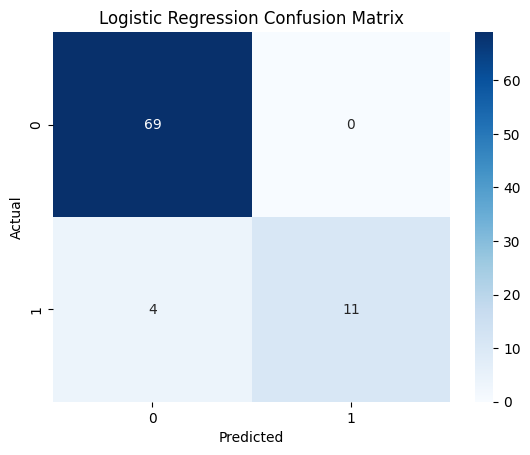


Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        69
         1.0       1.00      0.73      0.85        15

    accuracy                           0.95        84
   macro avg       0.97      0.87      0.91        84
weighted avg       0.95      0.95      0.95        84


k-Nearest Neighbors (kNN) Performance:
Accuracy: 0.87
Precision: 0.64
Recall: 0.60
F1-Score: 0.62

Confusion Matrix:
[[64  5]
 [ 6  9]]


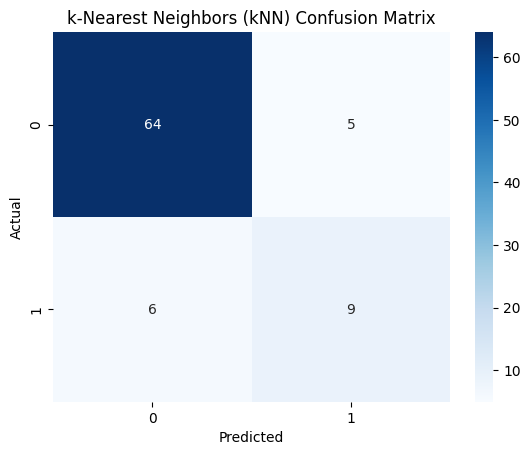


Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92        69
         1.0       0.64      0.60      0.62        15

    accuracy                           0.87        84
   macro avg       0.78      0.76      0.77        84
weighted avg       0.87      0.87      0.87        84


Support Vector Machine (SVM) Performance:
Accuracy: 0.95
Precision: 1.00
Recall: 0.73
F1-Score: 0.85

Confusion Matrix:
[[69  0]
 [ 4 11]]


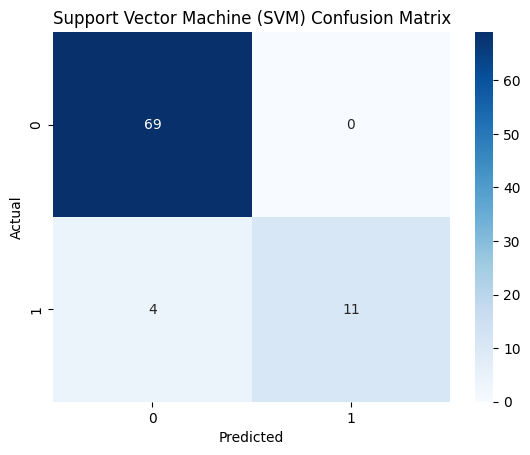


Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        69
         1.0       1.00      0.73      0.85        15

    accuracy                           0.95        84
   macro avg       0.97      0.87      0.91        84
weighted avg       0.95      0.95      0.95        84



In [ ]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = '/content/test.csv'
data = pd.read_csv(file_path)

# Menampilkan info awal dataset
print("\nDataset Loaded:")
print(data.head())
print("\nKolom dalam dataset:", data.columns)

# 1. Membuat Target Dummy (HighFare: 1 jika Fare > rata-rata, 0 jika sebaliknya)
average_fare = data['Fare'].mean()
data['HighFare'] = (data['Fare'] > average_fare).astype(int)

# 2. Preprocessing Data
# a. Menangani missing values
print("\nMengatasi missing values...")
imputer = SimpleImputer(strategy='mean')  # Untuk nilai numerik
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=['number']).columns

data[numerical_cols] = imputer.fit_transform(data[numerical_cols])
data[categorical_cols] = data[categorical_cols].fillna("Unknown")

print("Missing values setelah diatasi:")
print(data.isnull().sum())

# b. Encoding fitur kategorikal
print("\nEncoding fitur kategorikal...")
encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])
print("Data setelah encoding:")
print(data.head())

# 3. Membagi dataset menjadi fitur (X) dan target (y)
print("\nMembagi dataset menjadi fitur (X) dan target (y)...")
target_column = 'HighFare'
X = data.drop(columns=[target_column, 'PassengerId', 'Name', 'Ticket', 'Cabin'])  # Drop kolom yang tidak relevan
y = data[target_column]

# Split dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Dataset berhasil dibagi.")

# Standarisasi data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Model dan Evaluasi
def evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {acc:.2f}")
    print(f"Precision: {prec:.2f}")
    print(f"Recall: {rec:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print("\nConfusion Matrix:")
    print(cm)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} Confusion Matrix")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Logistic Regression
log_reg = LogisticRegression()
evaluate_model(log_reg, "Logistic Regression")

# k-Nearest Neighbors (kNN)
knn = KNeighborsClassifier(n_neighbors=5)
evaluate_model(knn, "k-Nearest Neighbors (kNN)")

# Support Vector Machine (SVM)
svm = SVC(kernel='linear', probability=True)
evaluate_model(svm, "Support Vector Machine (SVM)")
